## Time series visualization of weather data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [16, 12]
import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=1.5)

### Load the Data

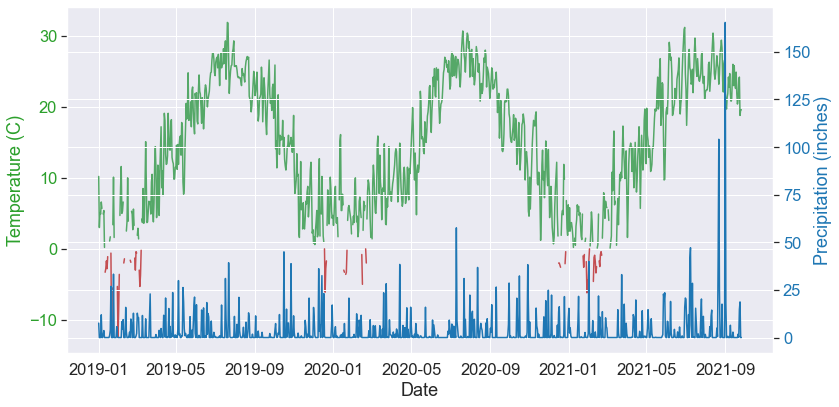

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# Create a data 
t = df.index
data1 = df.temp
data2 = df.precip

fig, ax1 = plt.subplots(figsize=(12,6))
z = df.temp > 0

color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (C)', color=color)
#ax1.scatter(t, data1, color=z.map({True: '#65A421', False: 'w'}), marker = 'o', edgecolors='k')

signal = df.temp.copy()
pos_signal = signal.copy()
neg_signal = signal.copy()

pos_signal[pos_signal <= 0] = np.nan
neg_signal[neg_signal > 0] = np.nan

#plotting
ax1.plot(t, pos_signal, color='g')
ax1.plot(t, neg_signal, color='r')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Precipitation (inches)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## OR combine important features in one figure

Features:

- Rainfall indicates the quantity of rain falling (mm)
- Temperature indicates the temperature (°C)
- Volume indicates the volume of water taken from the drinking water treatment plant (m 3 )
- Hydrometry indicates the groundwater level (m)

Target:

- Depth to Groundwater indicates the groundwater level (m from the ground floor)

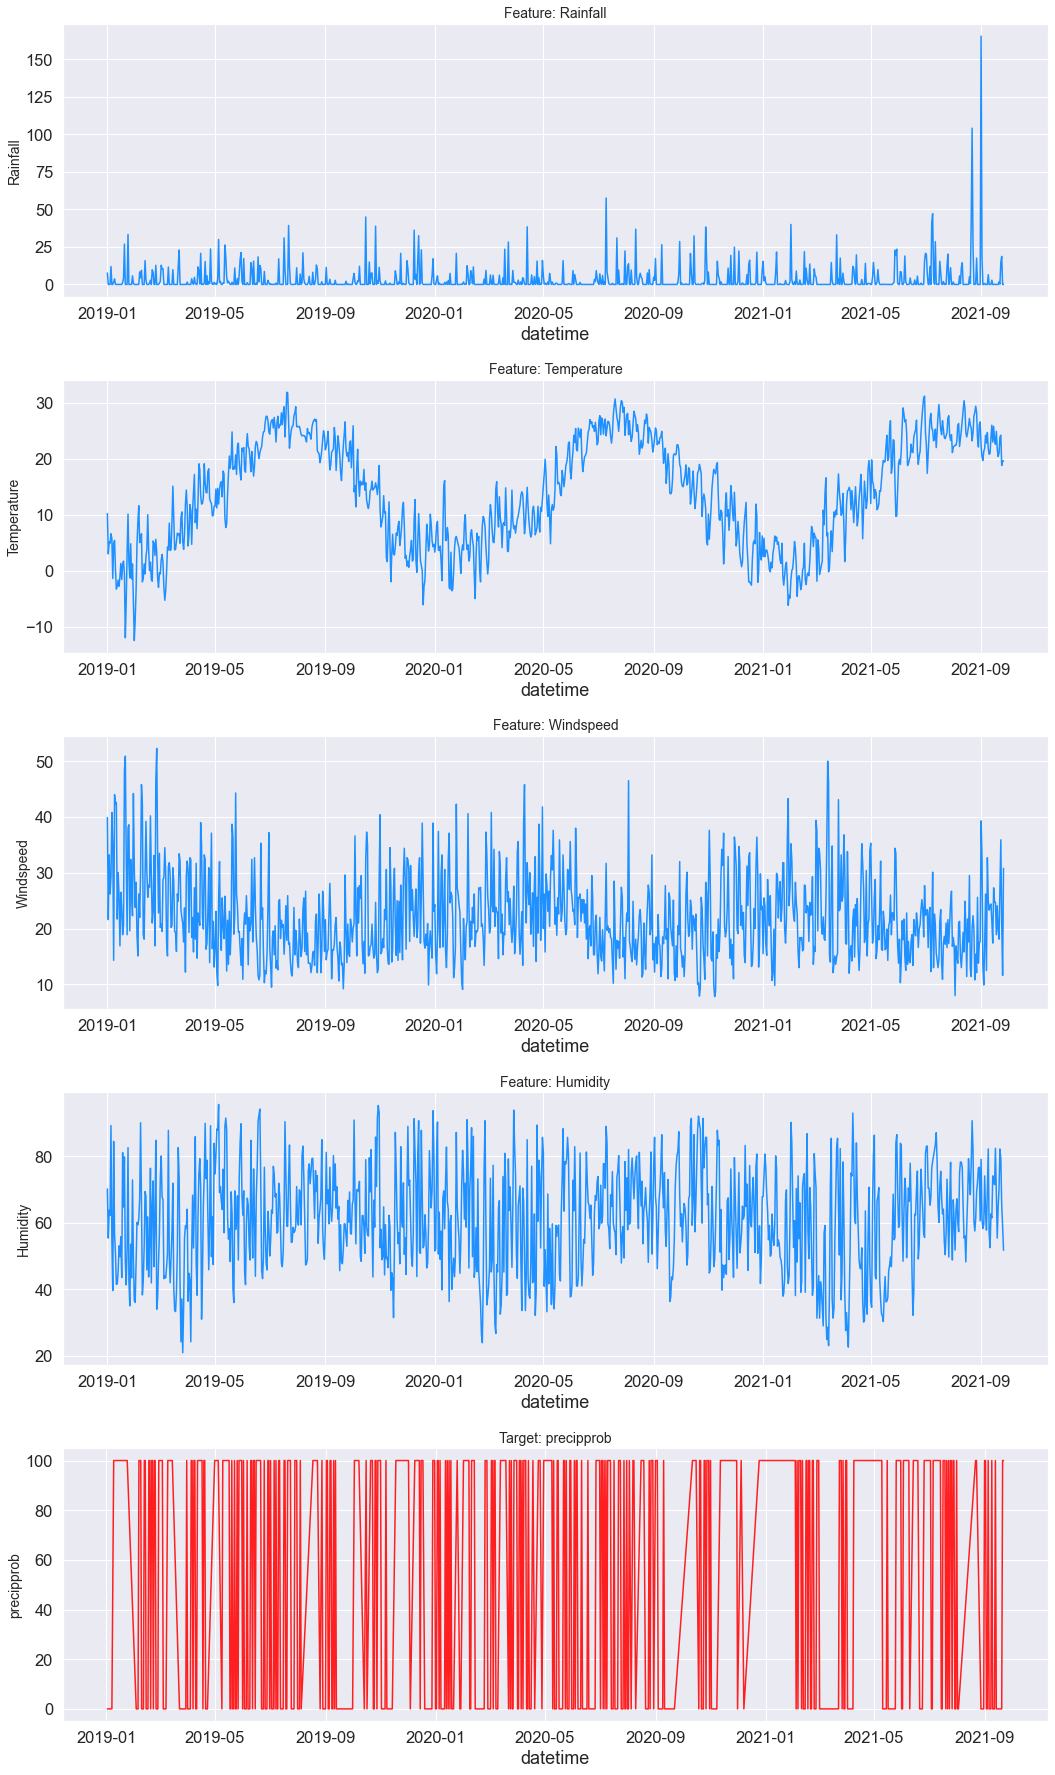

In [44]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

sns.lineplot(x=df.index, y=df.precip.fillna(np.inf), ax=ax[0], color='dodgerblue')
ax[0].set_title('Feature: Rainfall', fontsize=14)
ax[0].set_ylabel(ylabel='Rainfall', fontsize=14)


sns.lineplot(x=df.index, y=df.temp.fillna(np.inf), ax=ax[1], color='dodgerblue')
ax[1].set_title('Feature: Temperature', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)


sns.lineplot(x=df.index, y=df.windspeed.fillna(np.inf), ax=ax[2], color='dodgerblue')
ax[2].set_title('Feature: Windspeed', fontsize=14)
ax[2].set_ylabel(ylabel='Windspeed', fontsize=14)


sns.lineplot(x=df.index, y=df.humidity.fillna(np.inf), ax=ax[3], color='dodgerblue')
ax[3].set_title('Feature: Humidity', fontsize=14)
ax[3].set_ylabel(ylabel='Humidity', fontsize=14)


sns.lineplot(x=df.index, y=df.precipprob.fillna(np.inf), ax=ax[4], color='#ff1e20')
ax[4].set_title('Target: precipprob', fontsize=14)
ax[4].set_ylabel(ylabel='precipprob', fontsize=14)
plt.tight_layout()
plt.show()

## My hypothesis:
- Green line is mean temperature that is measured in New York city.
- Blue markers are the no. of traffic flow at that date.
- As it can be seen from plot, traffic flow is also high at high temperatures.
- The question is that can we predict future weather and according to this prediction can we know whether there will be high flow
- In order to answer this question lets first start with time series prediction.

## Resampling

In [58]:
resampled_df = df[['precip','temp']].resample('7D').mean()

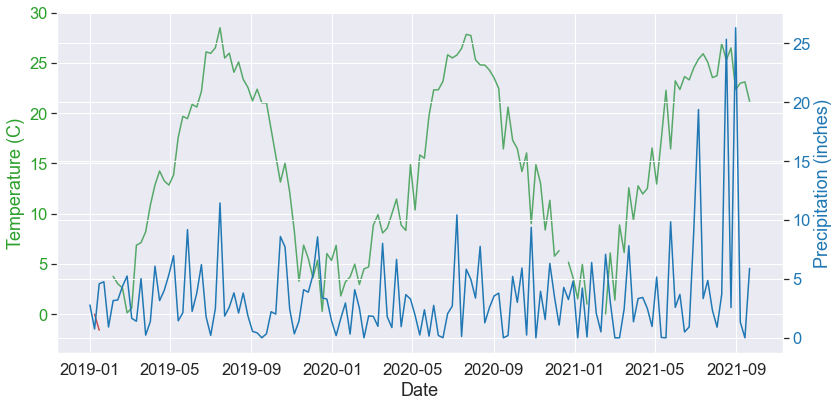

In [59]:
# Create a data 
t = resampled_df.index
data1 = resampled_df.temp
data2 = resampled_df.precip

fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (C)', color=color)

signal = resampled_df.temp.copy()
pos_signal = signal.copy()
neg_signal = signal.copy()

pos_signal[pos_signal <= 0] = np.nan
neg_signal[neg_signal > 0] = np.nan

#plotting
ax1.plot(t, pos_signal, color='g')
ax1.plot(t, neg_signal, color='r')

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Precipitation (inches)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# ax1.set_xticks(np.arange(3) )
# ax1.set_xticklabels(['dd', 'dfd', 'a'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

/Users/sunil/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='datetime', ylabel='temp'>

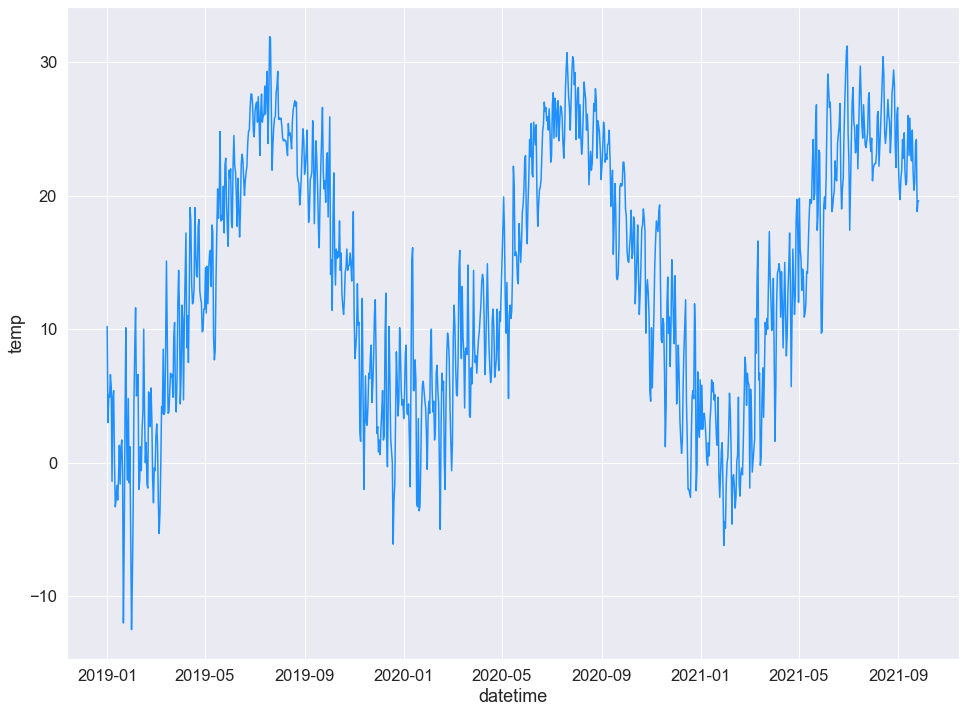

In [48]:
sns.lineplot(df.index, df.temp, color='dodgerblue')

/Users/sunil/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


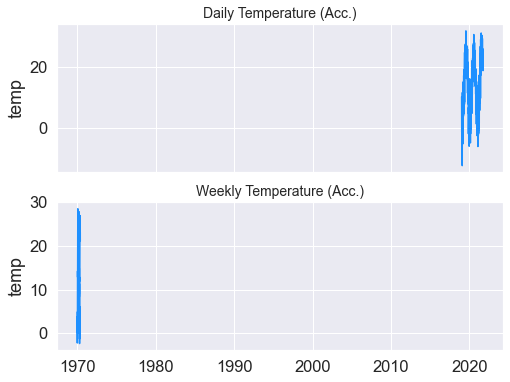

In [51]:
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(8,6))

sns.lineplot(x=df.index, y=df.temp, color='dodgerblue', ax=ax[0])
ax[0].set_title('Daily Temperature (Acc.)', fontsize=14)

resampled_df = df[['temp']].resample('7D').mean().reset_index(drop=False)
sns.lineplot(resampled_df.index, resampled_df.temp, color='dodgerblue', ax=ax[1])
ax[1].set_title('Weekly Temperature (Acc.)', fontsize=14)

plt.show()

## Stationarity ? 

Text(0, 0.5, 'temp')

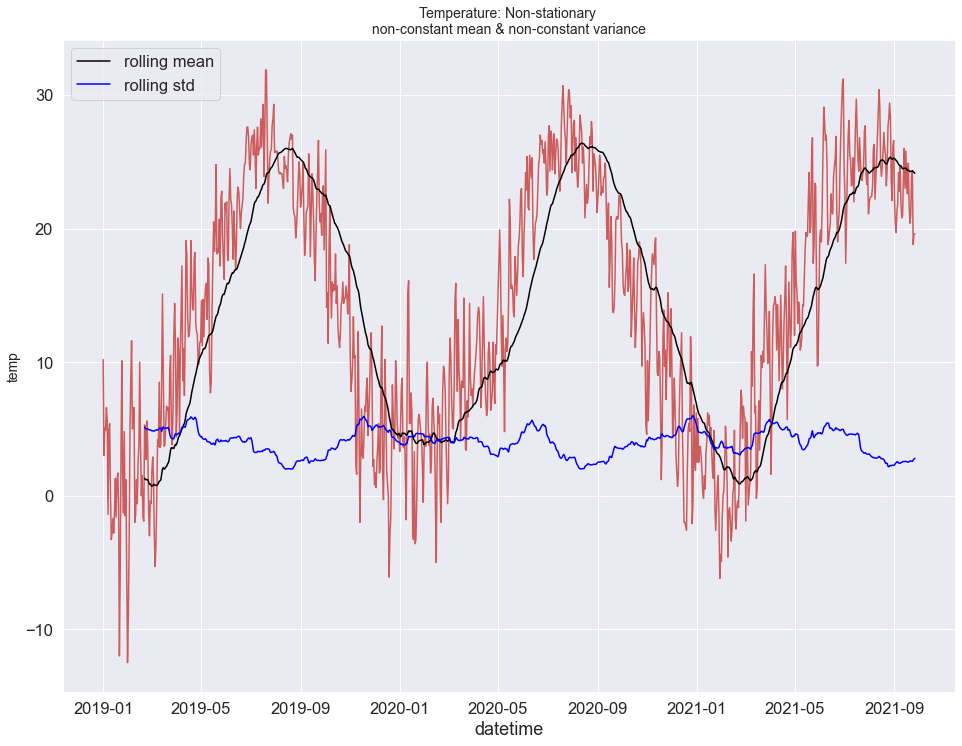

In [133]:
fig, ax = plt.subplots()
rolling_window = 52
sns.lineplot(x=df.index, y=df.temp, ax=ax, color='indianred')
sns.lineplot(x=df.index, y=df.temp.rolling(rolling_window).mean(), ax=ax, color='black', label='rolling mean')
sns.lineplot(x=df.index, y=df.temp.rolling(rolling_window).std(), ax=ax, color='blue', label='rolling std')
ax.set_title('Temperature: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax.set_ylabel(ylabel='temp', fontsize=14)


In [148]:
#df[df['description'].str.contains('Partly cloudy throughout the day.')]

In [14]:
df.conditions.unique

<bound method Series.unique of datetime
2019-01-01    Rain, Partially cloudy
2019-01-02          Partially cloudy
2019-01-03          Partially cloudy
2019-01-04          Partially cloudy
2019-01-05    Rain, Partially cloudy
                       ...          
2021-09-22    Rain, Partially cloudy
2021-09-23            Rain, Overcast
2021-09-24    Rain, Partially cloudy
2021-09-25                     Clear
2021-09-26          Partially cloudy
Name: conditions, Length: 1000, dtype: object>

### Total counts of weather conditions

## interpolate for missing values

In [ ]:

sns.lineplot(x=df.Date, y=df.Drainage_Volume.interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

df['Depth_to_Groundwater'] = df['Depth_to_Groundwater'].interpolate()